# Using `pyND.gbt.GBTspec`

This code reads individual datasets from a GBTIDL-style FITS file.

In [113]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
from pyND.gbt import GBTspec

## Loading GBT spectra from GBTIDL ASCII output

In [116]:
input_filename = 'data/HS0033+4300_GBT.dat'
x = GBTspec.from_ascii(input_filename)

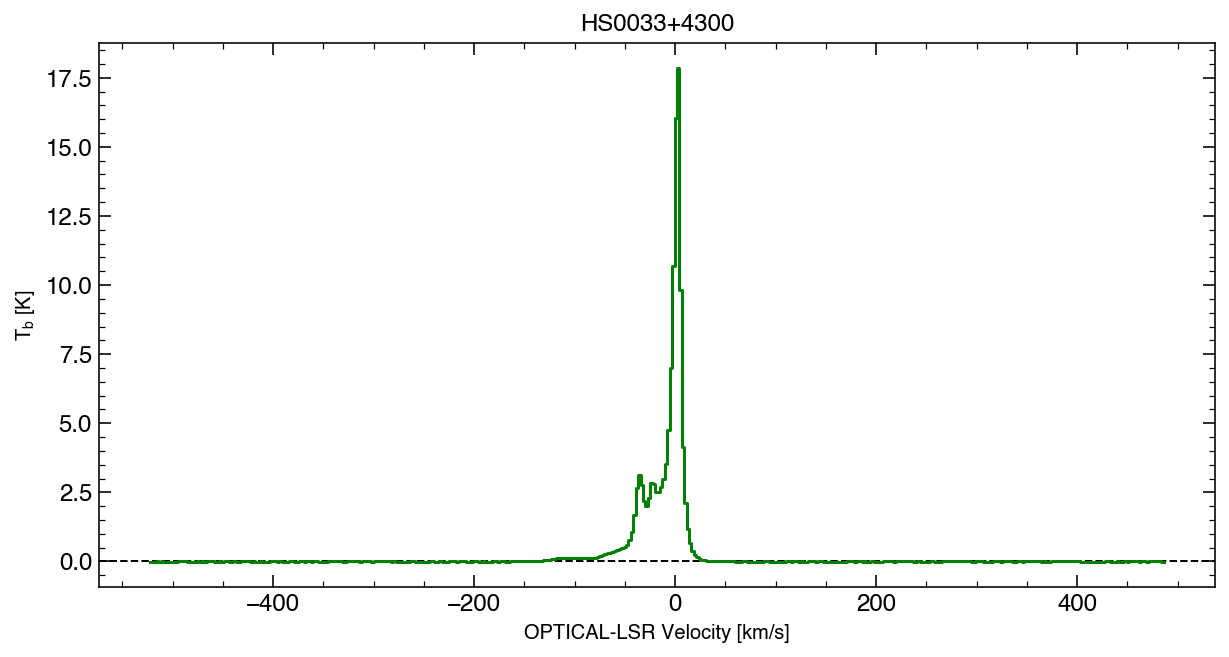

In [117]:
x.plotspectrum()

In [43]:
x.velocity[0:5]

array([-522.51558437, -520.10861545, -517.70160781, -515.29456145,
       -512.88747637])

In [44]:
x.Tb[0:5]

array([-0.0077822, -0.0115301, -0.0099428, -0.0004677, -0.0030863])

#### Metadata...

In [45]:
x.meta.keys()

dict_keys(['filename', 'object', 'RA', 'DEC', 'veldef', 'restfreq', 'Tsys', 'l', 'b'])

In [46]:
x.meta['object'],x.meta['RA'],x.meta['DEC']

('HS0033+4300', 9.095852083333332, 43.27781777777778)

## Loading GBT spectra from GBTIDL FITS format

### Loading from the list of objects


In [51]:
input_filename = 'data/GBTdata.fits'
y = GBTspec.from_GBTIDLindex(input_filename)

0: HS0033+4300         
1: HS0058+4213         
2: RXSJ0043.6+372521   
3: ZW535.012           
4: Q0030+3700          


Index of object to load:  0


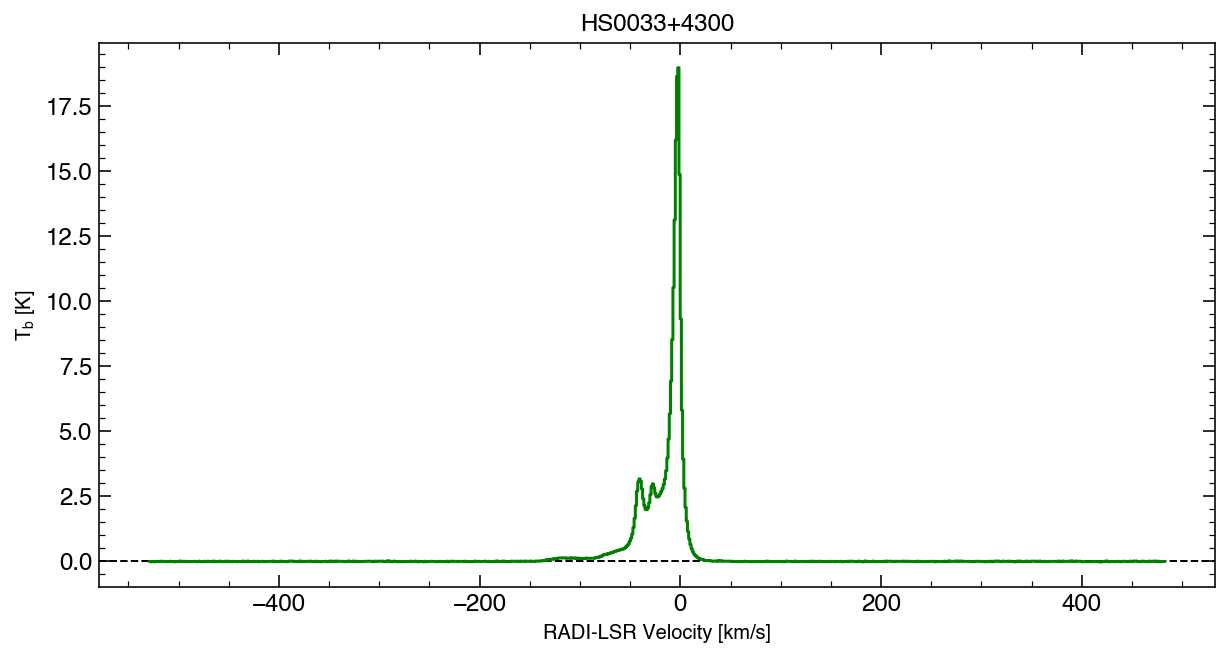

In [52]:
y.plotspectrum()

### Loading with an object name:


In [118]:
input_filename = 'data/GBTdata.fits'
object_name = 'HS0033+4300'
z = GBTspec.from_GBTIDL(input_filename,object_name)

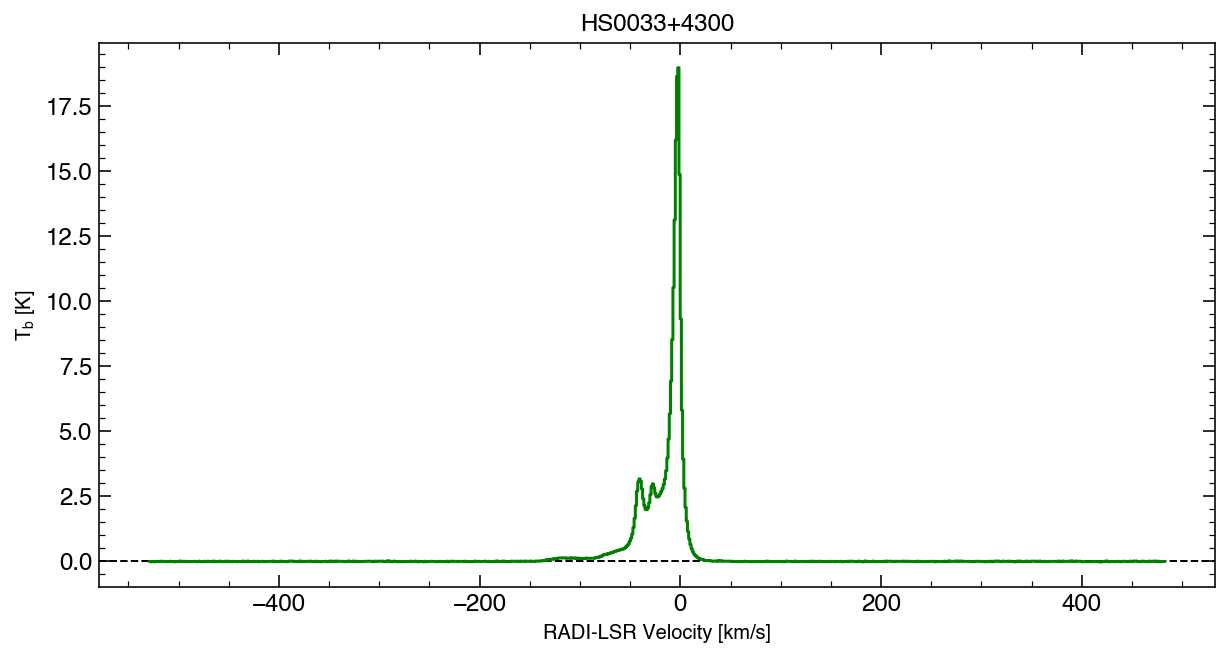

In [119]:
z.plotspectrum()

# Resample the results to a coarser velocity grid
*This is a flux-conserving process.*

In [121]:
z_new = z.copy()
new_velocity = np.arange(-400,100,10.)
z_new.resample(new_velocity,masked=True)

Text(0, 0.5, 'Tb [K]')

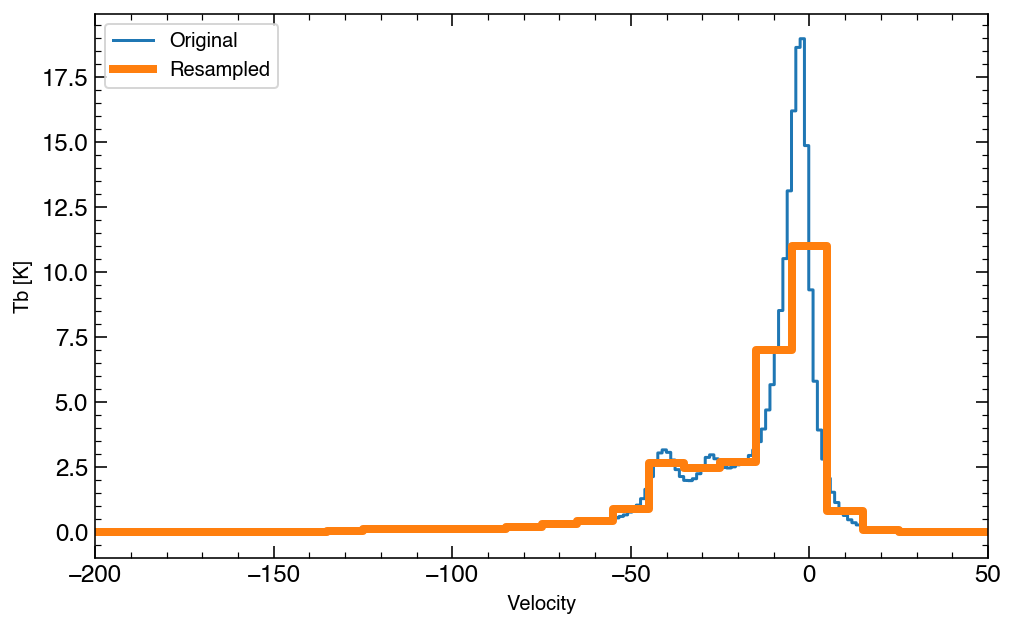

In [122]:
plt.figure(figsize=(8,5))
plt.plot(z.velocity,z.Tb,drawstyle='steps-mid',label='Original')
plt.plot(z_new.velocity,z_new.Tb,drawstyle='steps-mid',label='Resampled',lw=4)
plt.xlim(-100,50)
plt.legend(loc='upper left')
plt.xlim(-200,50)
plt.xlabel('Velocity')
plt.ylabel('Tb [K]');

## Compare the two results

In this example, the results are slightly different, as the ASCII data are saved in the OPTICAL-LSR frame, while the GBTIDL data are saved using the RADI-LSR, the radio astronomical definition of the LSR.

In [ ]:
plt.plot(z.velocity,z.Tb,drawstyle='steps-mid',label='RADIO')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL')
plt.xlim(-100,50)
plt.legend(loc='upper left')

# The following is not yet working...

## Change OPTICAL to RADIO

**N.B. This approach doesn't seem to shift the spectra by enough to be the source of the difference...**

In [ ]:
light_speed = np.float64(c.c.to('m/s').value)
nu0 = np.float64(1420405800.0000000000000000000)

# First calculate frequency from optical:
nu = (nu0/(1+(x.velocity)*1000./light_speed))
# Calculate radio definition
vrad =light_speed*((nu0-nu)/nu0)/1000.

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='RADIO')
plt.plot(vrad,x.Tb,drawstyle='steps-mid',label='OPTICAL-->RADIO',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')

## Change RADIO to OPTICAL

In [ ]:
light_speed = (c.c.to('m/s').value)
nu0 = (1420405800.0000000000000000000)

# Frequency from radio:
nu = nu0*(1-(x.velocity)*1000./light_speed)
# Calculate radio definition
vopt = (light_speed/1000.)*((nu0-nu)/nu)


In [ ]:
plt.plot(vopt,y.Tb,drawstyle='steps-mid',label='RADIO-->OPTICAL')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')

## Change RADIO to OPTICAL with built-in function

In [ ]:
input_filename = 'data/AMIGA-GBT.fits'
object_name = 'RBS2055'
y = GBTspec.from_GBTIDL(input_filename,object_name)

input_filename = 'data/RBS2055_GBT.dat'
x = GBTspec.from_ascii(input_filename)

x.change_veldef()



plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='RADIO-->OPTICAL')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')